<a href="https://colab.research.google.com/github/piusAI/DeepLearning_Basic/blob/main/Chap05_02_Affine_BackPropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###BackPropagation

Transpose

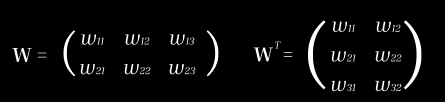

Affine Calc

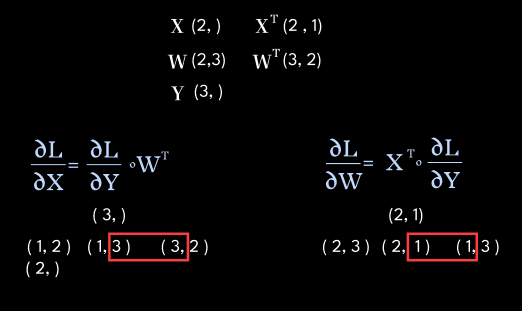

### Affine

In [2]:
import numpy as np

class affine:
  def __init__(self,W,b):
    self.W = W
    self.b = b

  def forward(self, x):
    self.x = x
    return np.dot(x,self.W) + self.b

  def backward(self, dout):
    dx = np.dot(dout, self.x.T)
    self.dW = np.dot(self.W.T, dout)
    self.db = np.sum(dout, axis=0)
    return dx

Axis = 1, Axis = 0 Confuse


| 함수                     | `axis=0`                        | `axis=1`                     |
| ---------------------- | ------------------------------- | ---------------------------- |
| `np.sum(X, axis=0)`    | **열(column)** 기준으로 합 (세로 방향 연산) | **행(row)** 기준으로 합 (가로 방향 연산) |
| `np.argmax(X, axis=0)` | 열(column)마다 가장 큰 값의 **행 인덱스**   | 행(row)마다 가장 큰 값의 **열 인덱스**   |


In [3]:
HJ = np.arange(12).reshape(4,-1)
print(HJ)

print(np.sum(HJ, axis=0)) # Column, 세로를 더하기
print(np.sum(HJ, axis=1)) # Rows, 가로를 더하기

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[18 22 26]
[ 3 12 21 30]


#### Self ?

In [4]:
class LearnSelf:
  def test(self, x, t):
    self.x = None # backward에서 활용시 오류 안남, IDE때문에
    self.t = t    # 추후 backward에서 활용하려고 저장.

| 구분                  | self로 저장   | 그냥 return |
| ------------------- | ---------- | --------- |
| 다른 메서드에서도 써야 함      | ✅ self로 저장 | ❌         |
| 파라미터 업데이트 등 나중에 쓸 값 | ✅ self로 저장 | ❌         |
| 단지 다음 layer로 넘겨주는 값 | ❌          | ✅ return  |


self.dW, self.db로 저장해놓은 이유는 parameter의 업데이트 떄문!

```
dw -= lr * dw
db -= lr * db
```
gradient descent활용시 parameter 계속 업데이트 해야해서



#### 4d Tensor까지 생각한 Affine!

In [5]:
import numpy as np
class Affine :
  def __init__(self,W,b):
    self.W = W
    self.b = b

    self.x = None
    self.original_x_shape = None

    self.dW = None
    self.dW = None

  def forward(self, x):
    # tensor 대응
    self.original_x_shape = x.shape
    x = x.reshape(x.shape[0], -1) # tensor만 대응하기에 vector를 쓸 수 없다!
    self.x = x

    out = np.dot(self.x, self.W) + self.b
    return out
  def backward(self,dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)

    dx = dx.reshape(* self.original_x_shape) #무시
    return dx

In [6]:
x = np.array([[1,1]]) #(1,2) 행렬로 써줘야지 에러가 안남! (2,)로 vector로 쓰면 에러남!
W = np.array([[1,2,3],[4,5,6]])
b = np.array([7,8,9])

gichul = Affine(W,b)

print(gichul.forward(x)) # => Y의 결과
print(gichul.backward(np.array([[2,1,-1]]))) #=> (3,) vector로 쓰면 에러남!

[[12 15 18]]
[[1 7]]


In [7]:
# (3,) vector로 활용하면 에러!
print(gichul.backward(np.array([2,1,-1])))

ValueError: shapes (2,1) and (3,) not aligned: 1 (dim 1) != 3 (dim 0)

In [8]:
print("dW \n", gichul.dW)
print("db \n ", gichul.db)

dW 
 [[ 2  1 -1]
 [ 2  1 -1]]
db 
  [ 2  1 -1]


In [9]:
print(gichul.dx) #error No set the self.dx

AttributeError: 'Affine' object has no attribute 'dx'

=> dx는 지역변수로만 활용했기 때문에 instance에서 불러올 수 없음!

In [10]:
X=np.array([[1,1],[2,3]])
print("forward : \n", gichul.forward(X) )
print("\n backward : \n", gichul.backward(np.array([[2,1,-1], [1,1,1]])) )
print("\n Weight : \n", gichul.dW)
print("\n bias : \n", gichul.db)

forward : 
 [[12 15 18]
 [21 27 33]]

 backward : 
 [[ 1  7]
 [ 6 15]]

 Weight : 
 [[4 3 1]
 [5 4 2]]

 bias : 
 [3 2 0]


=> 당연한 말이지만 Input, X와 Output ,Y만 Batch 처리가 된것이다.

Weight, Bias(parameter)는 당연히 size 그대로!

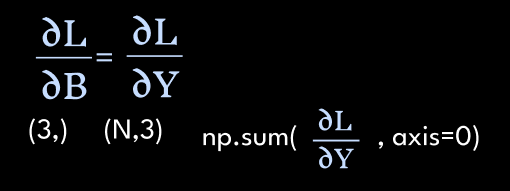

Bias는 Axis=0, Column, 열을 기준으로 더해줬다

#### Sigma index [ij, ijk]


In [22]:
pt = np.arange(12).reshape(-1,2,2)
pt2 = np.arange(16).reshape(4,2,2)

print(pt)
np.sum(pt,axis=0)


[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]


array([[12, 15],
       [18, 21]])

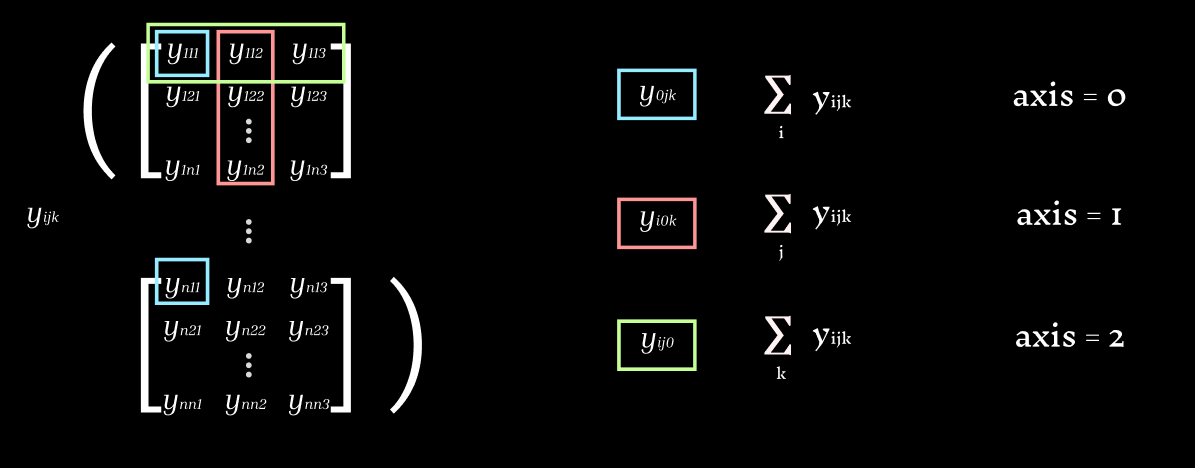

- axis=0, "층, i축"
- axis = 1, "행, j축"
- axis = 2, "열, k축"

#### BroadCast

Repeat <==> Sum 자동 Broad Cast의 숨은 의미는?

- 서로 역전파관계!

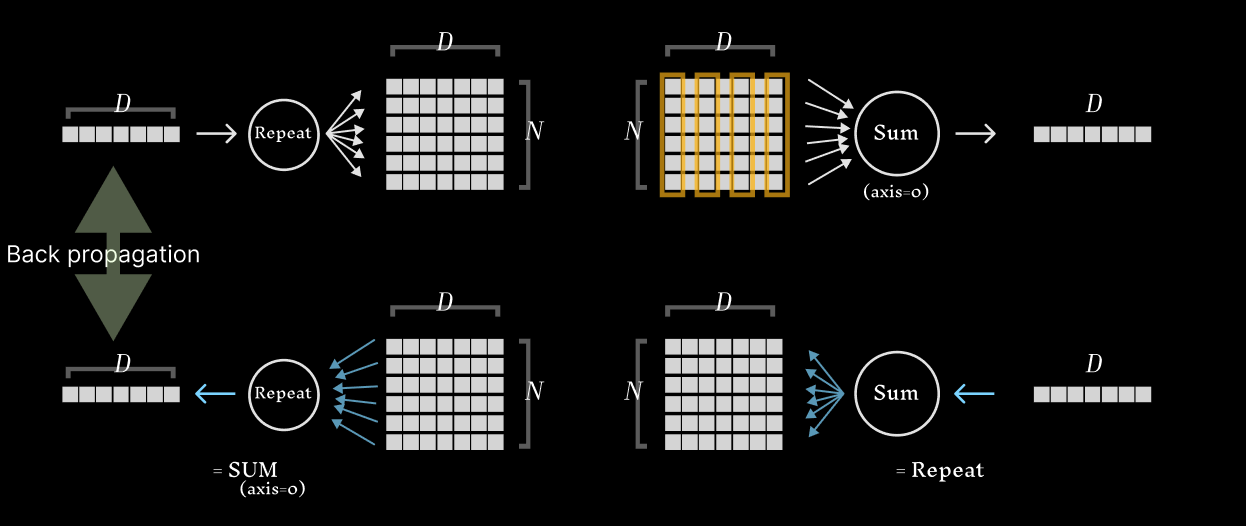

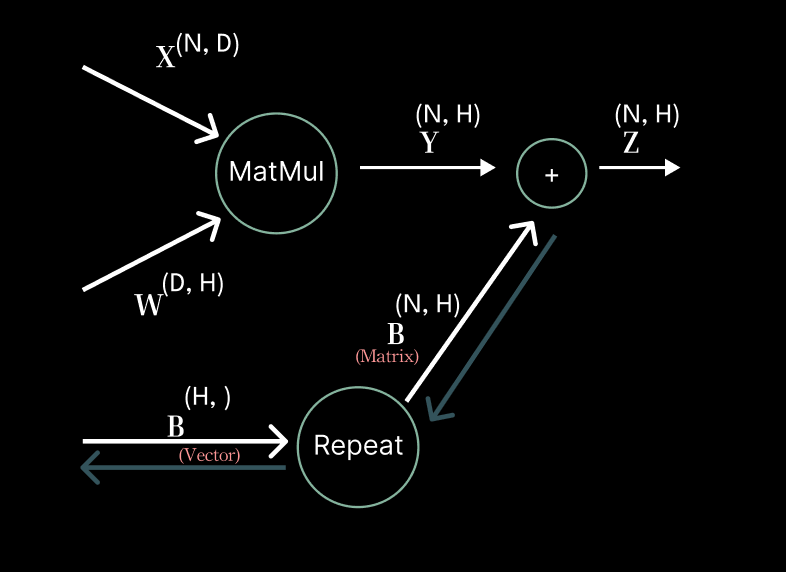


Bias Vector => Array

```
out = np.dot(self.x, self.y) + self.b
```
=> 이런식으로 x와 y가 Vector라면, batch가 아니어서 B를 그대로 더해도 되겠지만,

=> x와 y가 Array로, Batch라면 B를 1행 그대로 n행까지 복제


한번더, BackWard에서 왜 Bias가 각 열을 더한

```
np.sum(dout, axis=0)
```

으로 되나?


=> Forward에서 Y = X @ W + b

- X : shape (N, D) ← N개의 샘플 (batch size)
- W : shape (D, H) ← 은닉층 뉴런 수 H

- b(vector) : shape (H, ) ← **H개 bias**
- b(Matrix) : shape (N, H) ← H개 bias, **N개의 샘플**




---


=> Backward에서 dout :(N,H)

W, b는 parameter이고,

b = (N, H)로 역전파인 Matrix로 받더라도, Vector로 다시 변환 시켜놓아야함.


| 항목            | 설명                                             |
| ------------- | ---------------------------------------------- |
| `b`의 원래 shape | `(H,)` (뉴런 수만큼의 bias)                          |
| Forward 시     | `(N, H)`로 **Broadcast**되어 더해짐                  |
| Backward 시    | `dout`도 `(N, H)`니까, `axis=0`으로 **샘플 방향으로 sum** |
| 최종 `db`       | `(H,)`, 즉 bias vector의 gradient                |


최종 db를 구해놓고


```
bias -= lr * db
```
로 Gradient Descent로써

parameter Update !!
